## First test of parsing comment data

Import libraries and parse CSV data --> including only the comments and their labels

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models

data = pd.read_csv("./../data/train_set_0520.csv", usecols=['comment', 'non-information'])

Split data into train and test sets

In [2]:
train_size = int(len(data) * .8)
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

data['comment'] = data['comment'].apply(str)
#data['comment'] = data['comment'].replace('\d|the|a|is|from+', '').replace()

train_cat, test_cat = train_test_split(data['non-information'], train_size)
train_text, test_text = train_test_split(data['comment'], train_size)

#print(train_text)

Preprocess text

1. Tokenise data- break it into words, sort them taking into account their frequency

In [3]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words,
                                              char_level=True)
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

vectorise data - map an int value to each word
convert the labels to the values of 0 or 1 (one-hot representation)

In [4]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Train the model
A sequential model from Keras was chosen, as we have one input data (a comment)
and one output (information/no information)
-- layers in Keras - building blocks of neural network

hyperparameters:
batch_size- the number of training examples used in one iteration
epochs- the number of passes of the entire training set



Epoch 1/100
95/95 [==============================] - 1s 14ms/step - loss: 0.4985 - accuracy: 0.7593 - val_loss: 0.6651 - val_accuracy: 0.3905

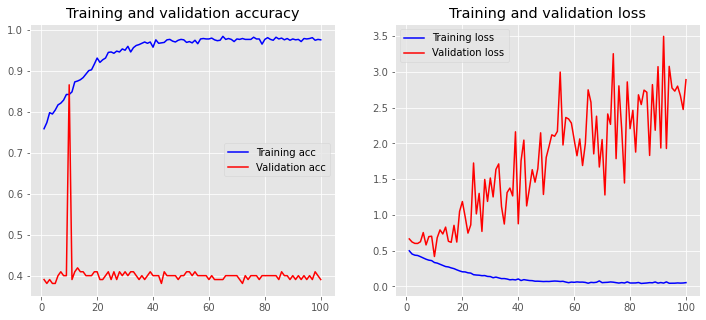

In [5]:
#hyperparameters
batch_size = 10
epochs = 100

model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

print(history)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('\nTest loss:', score[0])
print('\nTest accuracy:', score[1])